<a href="https://colab.research.google.com/github/truongthuanr/self-learning-project/blob/main/03_MallCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information

Dataset: https://www.kaggle.com/shwetabh123/mall-customers

Get the customer data include following feature: 
* Customer ID
* Customer Gender
* Customer Age
* Annual income of customer
* Spending score of the customer

**Problem:** Analyzing and grouping customer for develop business strategy

Reference Material:
* KMeans clustering: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

* https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

* https://medium.com/analytics-vidhya/mall-customers-cluster-analysis-b2ece6effdaa

* https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/

# Import Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/truongthuanr/self-learning-project/main/dataset/mall-customer/Mall_Customers.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

Check if is there any null data? 

In [8]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**No null data**

Compare the gender

In [9]:
sns.set_style('whitegrid')

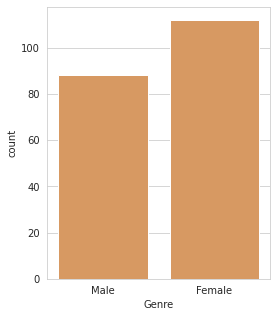

In [10]:
plt.figure(1,figsize=(4,5))
sns.countplot(x=df["Genre"],color="#EB984E")

Discover the distibution of features

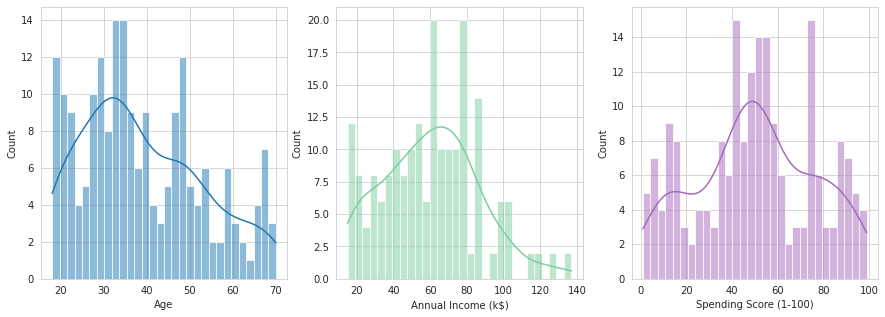

In [11]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.histplot(df['Age'],ax=axes[0],kde=True,bins=30)
sns.histplot(df['Annual Income (k$)'],ax=axes[1],kde=True,bins=30,color="#7DCEA0")
sns.histplot(df['Spending Score (1-100)'],ax=axes[2],kde=True,bins=30, color="#A569BD")

Age vs Anual Income group by Genre

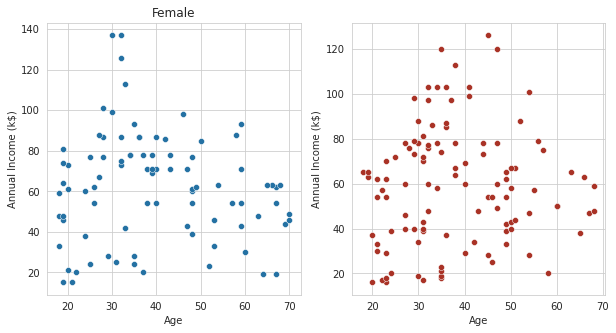

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.scatterplot(x=df.Age[df["Genre"]=='Male'], y=df["Annual Income (k$)"], ax=axes[0],color="#2471A3")
axes[0].set_title('Male')
sns.scatterplot(x=df.Age[df["Genre"]=='Female'], y=df["Annual Income (k$)"], ax=axes[1],color="#A93226")
axes[0].set_title('Female');

-> People in age (25-50) get more anual income

# Model

In [13]:
from sklearn.cluster import KMeans

In [14]:
## segment clustering with Annual income and spending Score

Using Elbow method to find the number of clusters

In [15]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)

In [16]:
x=pd.DataFrame()
x['Annual Income (k$)']=df['Annual Income (k$)'].copy()
x['Spending Score (1-100)'] = df['Spending Score (1-100)'].copy()

In [17]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
ymeans = km.fit_predict(x)

In [23]:
ymeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

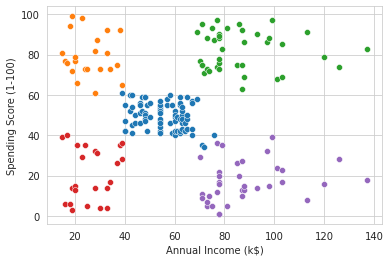

In [24]:
for i in range(0,5):
  sns.scatterplot(x=df[ymeans==i]['Annual Income (k$)'],y=df[ymeans==i]['Spending Score (1-100)'])

## Clustering use all feature

### Handle Category data

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lbl = LabelEncoder()

In [27]:
lbl.fit(list(df['Genre'].values))

LabelEncoder()

In [28]:
df1 = df.copy()

In [29]:
df1["Genre"] = lbl.transform(list(df['Genre'].values))

In [30]:
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [31]:
lbl.inverse_transform([0])

array(['Female'], dtype='<U6')

### Stardardize data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scl = StandardScaler()

In [34]:
# variable store within cluster sum of square 
wcss = []

for i in range(1,20):
  km_ = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=40)
  km_.fit(scl.fit_transform(df1))
  wcss.append(km_.inertia_)

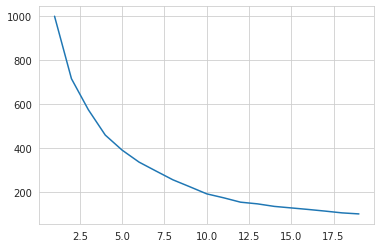

In [35]:
sns.lineplot(x=range(1,20),y=wcss)

In [36]:
km1 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=40)
ymeans1 = km1.fit_predict(df1)

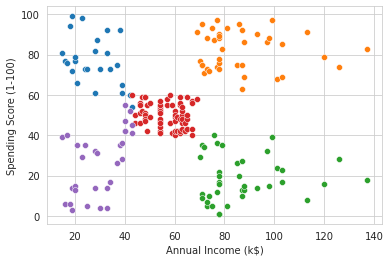

In [37]:
for i in range(0,5):
  sns.scatterplot(x=df[ymeans1==i]['Annual Income (k$)'],y=df[ymeans1==i]['Spending Score (1-100)'])

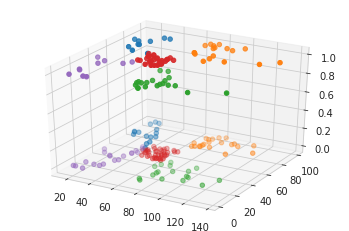

In [42]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(0,5):
  ax.scatter(xs=df1[ymeans1==i]['Annual Income (k$)'],ys=df1[ymeans1==i]['Spending Score (1-100)'],zs=df1[ymeans1==i]['Genre'])